# Data analysis script for Minivae project

In this script, we will perform some basic data analysis on the dataset used in the Minivae project.
This will help us identify any potential issues with the data, such as missing values or outliers,
and provide insights into the distribution of the data.
This will also help us understand the characteristics of the data before we proceed with training the model, and find potential metrics to define what good data is.

## Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns

## Load dataset

In [ ]:
dataset_path = 'datasets/db_pitch_radius_5700.npy'
dataset = np.load(dataset_path, allow_pickle=True).item()

In [9]:
pitches = dataset["data"]["pitch"]
radiuses = dataset["data"]["radius"]
z = dataset["time"]

qsup = dataset["values"]["qsup"]
e95 = dataset["values"]["e95"]
e99 = dataset["values"]["e99"]
coil_E = dataset["values"]["coil_E"]

## Metrics calculation

In [ ]:
# Calculation of metrics on each of the pitches, which will be their "imprints", and be used to compare them to the scalars

means = []
stds = []
medians = []
skews = []
kurtoses = []
mins = []
maxs = []
integrals = []
derivative_integrals = []
L1_norms = []
L2_norms = []
pca_1s = []
pca_2s = []
pca_3s = []

def calculate_metrics(profile):
    mean = np.mean(profile)
    std = np.std(profile)
    median = np.median(profile)
    skew = stats.skew(profile)
    kurtosis = stats.kurtosis(profile)
    min_val = np.min(profile)
    max_val = np.max(profile)
    integral = np.trapz(profile, dx=1)  # Assuming uniform spacing
    derivative_integral = np.trapz(np.gradient(profile), dx=1)  # Integral of the derivative
    L1_norm = np.sum(np.abs(profile))
    L2_norm = np.sqrt(np.sum(profile**2))
    return (mean, std, median, skew, kurtosis, min_val, max_val, integral,
            derivative_integral, L1_norm, L2_norm)

for i in range(len(pitches)):
    profile = pitches[i]
    metrics = calculate_metrics(profile)
    means.append(metrics[0])
    stds.append(metrics[1])
    medians.append(metrics[2])
    skews.append(metrics[3])
    kurtoses.append(metrics[4])
    mins.append(metrics[5])
    maxs.append(metrics[6])
    integrals.append(metrics[7])
    derivative_integrals.append(metrics[8])
    L1_norms.append(metrics[9])
    L2_norms.append(metrics[10])
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pitches)
pca_1s = pca_result[:, 0]
pca_2s = pca_result[:, 1]
pca_3s = pca_result[:, 2]
    

array([-0.0003123 , -0.00045279,  0.0051016 , ...,  0.00122223,
       -0.00195262,  0.00435113])

In [21]:
# Same thing for radiuses
means_r = []
stds_r = []
medians_r = []
skews_r = []
kurtoses_r = []
mins_r = []
maxs_r = []
integrals_r = []
derivative_integrals_r = []
L1_norms_r = []
L2_norms_r = []
pca_1s_r = []
pca_2s_r = []
pca_3s_r = []

for i in range(len(radiuses)):
    profile = radiuses[i]
    metrics = calculate_metrics(profile)
    means_r.append(metrics[0])
    stds_r.append(metrics[1])
    medians_r.append(metrics[2])
    skews_r.append(metrics[3])
    kurtoses_r.append(metrics[4])
    mins_r.append(metrics[5])
    maxs_r.append(metrics[6])
    integrals_r.append(metrics[7])
    derivative_integrals_r.append(metrics[8])
    L1_norms_r.append(metrics[9])
    L2_norms_r.append(metrics[10])
pca_r = PCA(n_components=3)
pca_result_r = pca_r.fit_transform(radiuses)
pca_1s_r = pca_result_r[:, 0]
pca_2s_r = pca_result_r[:, 1]
pca_3s_r = pca_result_r[:, 2]

C:\Users\vdubu\AppData\Local\Temp\ipykernel_18284\520820022.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(profile)
C:\Users\vdubu\AppData\Local\Temp\ipykernel_18284\520820022.py:23: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = stats.kurtosis(profile)


In [27]:
# Store the metrics in a DataFrame for easy analysis
metrics_df = pd.DataFrame({
    'pitch_mean': means,
    'pitch_std': stds,
    'pitch_median': medians,
    'pitch_skew': skews,
    'pitch_kurtosis': kurtoses,
    'pitch_min': mins,
    'pitch_max': maxs,
    'pitch_integral': integrals,
    'pitch_derivative_integral': derivative_integrals,
    'pitch_L1_norm': L1_norms,
    'pitch_L2_norm': L2_norms,
    'pitch_pca_1': pca_1s,
    'pitch_pca_2': pca_2s,
    'pitch_pca_3': pca_3s,
    
    'radius_mean': means_r,
    'radius_std': stds_r,
    'radius_median': medians_r,
    'radius_skew': skews_r,
    'radius_kurtosis': kurtoses_r,
    'radius_min': mins_r,
    'radius_max': maxs_r,
    'radius_integral': integrals_r,
    'radius_derivative_integral': derivative_integrals_r,
    'radius_L1_norm': L1_norms_r,
    'radius_L2_norm': L2_norms_r,
    'radius_pca_1': pca_1s_r,
    'radius_pca_2': pca_2s_r,
    'radius_pca_3': pca_3s_r,

    'qsup': qsup,
    'e95': e95,
    'e99': e99,
    'coil_E': coil_E
})

## Analysis of the data

c:\Users\vdubu\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Matrix of Metrics')

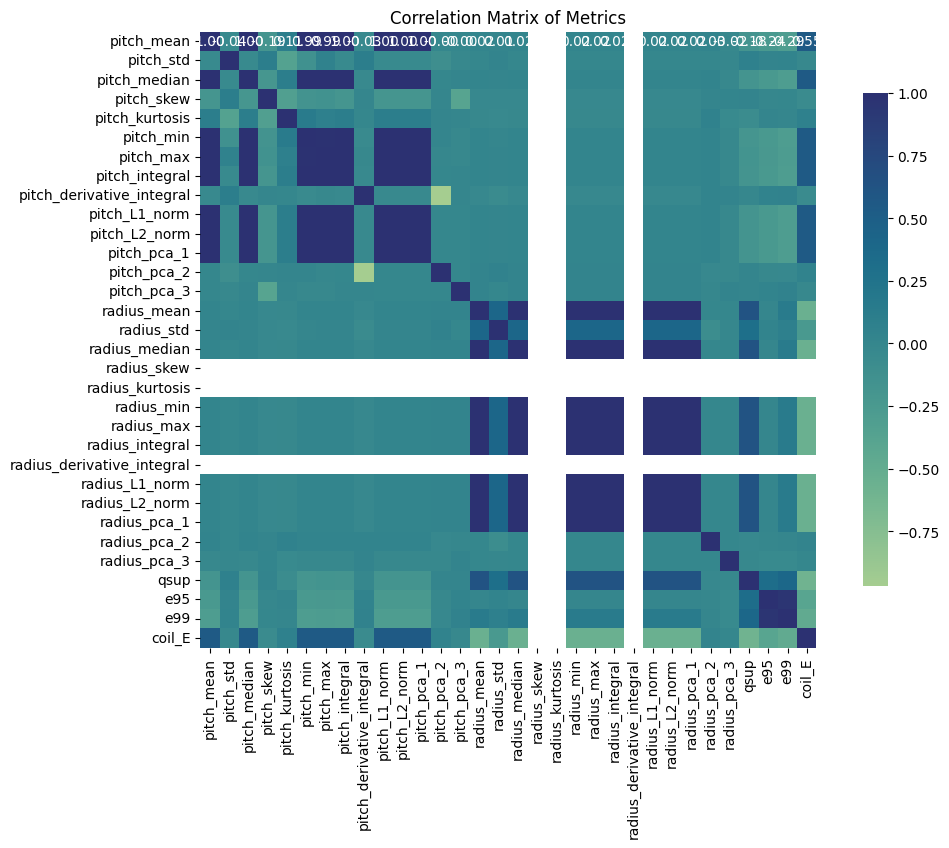

In [32]:
# Visualize the correlations of the metrics via a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = metrics_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Metrics')